In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from LearningAlgorithms_01 import ClassificationAlgorithms
from sklearn.metrics import accuracy_score,confusion_matrix

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"]=(20,5)
plt.rcParams["figure.dpi"]=100
plt.rcParams["lines.linewidth"]=2




In [2]:
df=pd.read_pickle("../../data/interim/03_Featured_Data.pkl")
df

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,...,Gyroscope_r_pse,Gyroscope_r_freq_0.0_Hz_ws_14,Gyroscope_r_freq_0.357_Hz_ws_14,Gyroscope_r_freq_0.714_Hz_ws_14,Gyroscope_r_freq_1.071_Hz_ws_14,Gyroscope_r_freq_1.429_Hz_ws_14,Gyroscope_r_freq_1.786_Hz_ws_14,Gyroscope_r_freq_2.143_Hz_ws_14,Gyroscope_r_freq_2.5_Hz_ws_14,Cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,0.0,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,0.0,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,0
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,0.0,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,0
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,heavy,30,...,0.0,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,0
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,heavy,30,...,0.0,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,40,...,0.0,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,4
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,40,...,0.0,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,1
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,...,0.0,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,1


In [3]:
df_train=df.drop(["Participants","Category","Set","Duration"],axis=1)
df_train

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Label,pca_1,pca_2,pca_3,...,Gyroscope_r_pse,Gyroscope_r_freq_0.0_Hz_ws_14,Gyroscope_r_freq_0.357_Hz_ws_14,Gyroscope_r_freq_0.714_Hz_ws_14,Gyroscope_r_freq_1.071_Hz_ws_14,Gyroscope_r_freq_1.429_Hz_ws_14,Gyroscope_r_freq_1.786_Hz_ws_14,Gyroscope_r_freq_2.143_Hz_ws_14,Gyroscope_r_freq_2.5_Hz_ws_14,Cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,bench,-0.306308,-0.170012,-0.020847,...,0.0,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,bench,-0.286807,-0.077810,0.041118,...,0.0,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,0
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,bench,-0.324602,-0.068072,0.035701,...,0.0,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,0
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,bench,-0.324352,-0.066294,0.036481,...,0.0,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,0
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,bench,-0.295388,-0.080264,0.051910,...,0.0,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,row,0.340833,-0.024316,-0.079494,...,0.0,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,4
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,row,0.429542,-0.180736,-0.050210,...,0.0,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,1
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,row,0.346775,-0.147540,-0.051285,...,0.0,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,1


In [4]:
X=df_train.drop("Label",axis=1)
y=df_train["Label"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25,stratify=y)
X_test


,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,pca_1,pca_2,pca_3,Accelerometer_r,...,Gyroscope_r_pse,Gyroscope_r_freq_0.0_Hz_ws_14,Gyroscope_r_freq_0.357_Hz_ws_14,Gyroscope_r_freq_0.714_Hz_ws_14,Gyroscope_r_freq_1.071_Hz_ws_14,Gyroscope_r_freq_1.429_Hz_ws_14,Gyroscope_r_freq_1.786_Hz_ws_14,Gyroscope_r_freq_2.143_Hz_ws_14,Gyroscope_r_freq_2.5_Hz_ws_14,Cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-14 13:27:05.000,-0.096590,0.640300,-0.394175,22.351351,-7.330114,-5.056275,-0.218907,-0.296260,0.099440,0.758081,...,0.0,235.184174,40.152347,-8.881694,19.070057,-5.370766,-27.611375,-20.060007,12.610739,0
2019-01-14 13:57:35.600,-0.131711,0.916163,0.116533,-2.510891,-2.345862,-11.372367,-0.304402,0.006651,-0.038299,0.932890,...,0.0,486.536043,-73.737990,45.089713,-4.015153,-53.204131,11.594376,-1.507629,-7.365480,0
2019-01-11 16:24:37.800,0.046123,-1.079646,-0.053480,-13.050292,-6.116112,-6.235614,0.390272,-0.130372,-0.032142,1.081953,...,0.0,304.379457,-55.665318,14.578421,-75.498306,49.831060,12.112781,-21.380137,5.046672,1
2019-01-19 17:22:53.000,0.920264,-0.278027,-0.006213,-8.897143,-0.455310,-0.180389,0.191540,0.076093,0.394166,0.961365,...,0.0,878.031185,-93.136056,-143.507988,156.670907,13.756987,-73.462315,-10.258633,3.032286,2
2019-01-15 19:12:12.400,0.378047,0.633597,0.645276,4.650798,-3.875410,0.451335,-0.150687,0.394782,0.064902,0.980177,...,0.0,174.412675,-30.687595,20.488805,-8.053934,23.954891,1.481539,2.167062,2.834133,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 16:24:28.000,-0.015608,-0.738337,0.271413,23.989350,3.663078,5.823278,0.277117,0.060776,-0.080717,0.786797,...,0.0,213.265943,7.411804,25.612212,-61.979071,-13.828822,-4.292109,2.715965,6.385478,4
2019-01-14 13:57:33.600,-0.016574,0.978686,0.323584,-2.470581,-4.838477,17.048292,-0.310903,0.150001,-0.033121,1.030926,...,0.0,539.719992,69.996095,10.466205,-59.766423,53.395183,59.220532,38.585541,39.478630,3
2019-01-15 19:04:13.800,0.279690,0.563296,0.605349,-7.235989,-1.315629,1.769725,-0.136305,0.352197,0.014443,0.872913,...,0.0,120.277540,-37.956970,37.970055,-21.696367,5.425213,2.739522,-0.543247,-2.591478,3


In [5]:
basic_col=["Accelerometer_x","Accelerometer_y","Accelerometer_z","Gyroscope_x","Gyroscope_y","Gyroscope_z"]
square_col=["Accelerometer_r","Gyroscope_r"]
pca_col=["pca_1","pca_2","pca_3"]
time_col=[f for f in df_train.columns if "_temp_" in f]
freq_col=[f for f in df_train.columns if ("_freq" in f) or ("_pse" in f)]
cluster_col=["Cluster"]
print(len(basic_col))
print(len(square_col))
print(len(pca_col))
print(len(time_col))
print(len(freq_col))
print(len(cluster_col))

6
2
3
16
88
1


In [6]:
df_train.columns[30:]

Index(['Accelerometer_x_pse', 'Accelerometer_x_freq_0.0_Hz_ws_14',
       'Accelerometer_x_freq_0.357_Hz_ws_14',
       'Accelerometer_x_freq_0.714_Hz_ws_14',
       'Accelerometer_x_freq_1.071_Hz_ws_14',
       'Accelerometer_x_freq_1.429_Hz_ws_14',
       'Accelerometer_x_freq_1.786_Hz_ws_14',
       'Accelerometer_x_freq_2.143_Hz_ws_14',
       'Accelerometer_x_freq_2.5_Hz_ws_14', 'Accelerometer_y_max_freq',
       'Accelerometer_y_freq_weighted', 'Accelerometer_y_pse',
       'Accelerometer_y_freq_0.0_Hz_ws_14',
       'Accelerometer_y_freq_0.357_Hz_ws_14',
       'Accelerometer_y_freq_0.714_Hz_ws_14',
       'Accelerometer_y_freq_1.071_Hz_ws_14',
       'Accelerometer_y_freq_1.429_Hz_ws_14',
       'Accelerometer_y_freq_1.786_Hz_ws_14',
       'Accelerometer_y_freq_2.143_Hz_ws_14',
       'Accelerometer_y_freq_2.5_Hz_ws_14', 'Accelerometer_z_max_freq',
       'Accelerometer_z_freq_weighted', 'Accelerometer_z_pse',
       'Accelerometer_z_freq_0.0_Hz_ws_14',
       'Accelerometer_z

In [7]:
f_set_1=list(set(basic_col))
f_set_2=list(set(basic_col+square_col+pca_col))
f_set_3=list(set(f_set_2+time_col))
f_set_4=list(set(f_set_3+freq_col+cluster_col))

In [8]:
learner=ClassificationAlgorithms()
selected_col,ordered_col,orederd_scores=learner.forward_selection(10,X_train,y_train)

0
1
2
3
4
5
6
7
8
9


In [9]:
orederd_scores

[0.885556704584626,
 0.9944846604619096,
 0.9986211651154774,
 0.9993105825577387,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693]

In [10]:
selected_col

['Accelerometer_z_freq_0.0_Hz_ws_14',
 'Gyroscope_z_temp_std_ws_5',
 'Accelerometer_x_freq_0.0_Hz_ws_14',
 'Accelerometer_y_freq_0.0_Hz_ws_14',
 'Accelerometer_r_temp_std_ws_5',
 'Accelerometer_x_pse',
 'Gyroscope_r_temp_std_ws_5',
 'Accelerometer_z_pse',
 'Gyroscope_r_pse',
 'Accelerometer_x_freq_weighted']

In [11]:

iterations=1
score_df=pd.DataFrame()
possible_feature_sets=[
    f_set_1,f_set_2,f_set_3,f_set_4,selected_col
]
feature_names=[
    "f_col_1",
    "f_col_2",
    "f_col_3",
    "f_col_4",
    "selected_col",
]
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])


Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [24]:
score_list=score_df.sort_values(by="accuracy",ascending=False).head()
print(score_list)

  model   feature_set  accuracy
2   KNN  selected_col  1.000000
1    RF       f_col_3  1.000000
3    DT       f_col_3  0.998966
1    RF  selected_col  0.998966
0    NN  selected_col  0.998966


In [13]:
class_train_y,class_test_y,class_train_prob_y,class_test_prob_y=learner.random_forest(
    X_train[f_set_4],y_train,X_test[f_set_4],gridsearch=True
)

In [14]:
accuracy=accuracy_score(y_test,class_test_y)
accuracy

1.0

In [15]:
classes=class_test_prob_y.columns
cm=confusion_matrix(y_test,class_test_y,labels=classes)

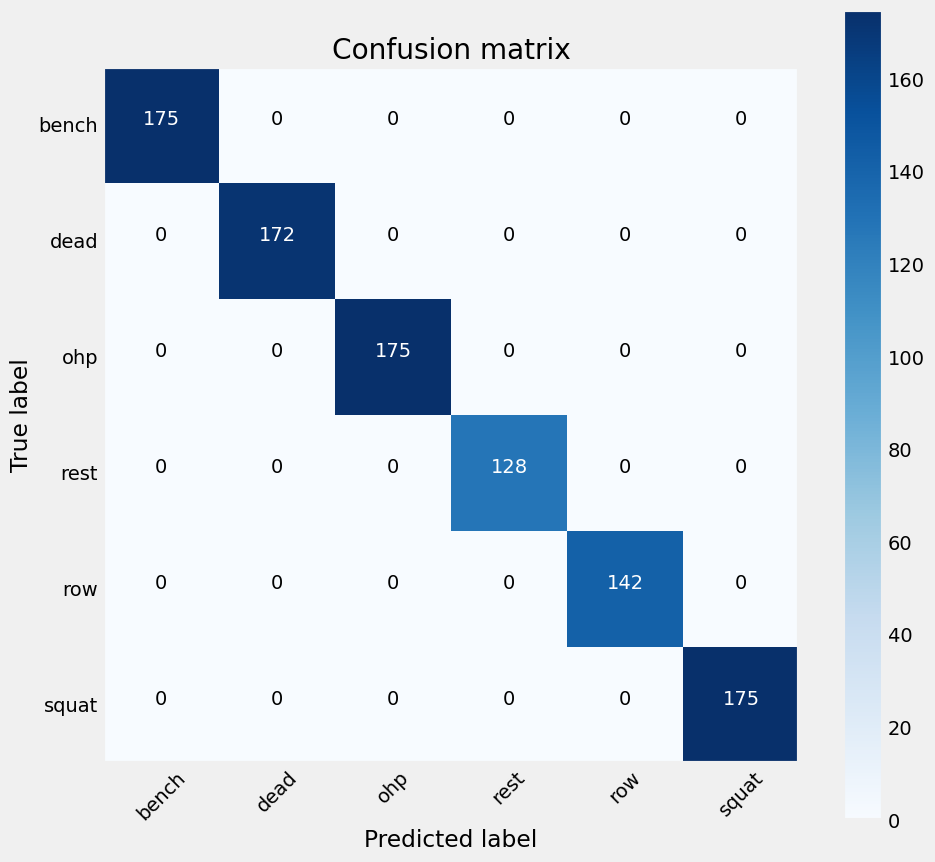

In [16]:
# create confusion matrix for cm
import itertools


plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()


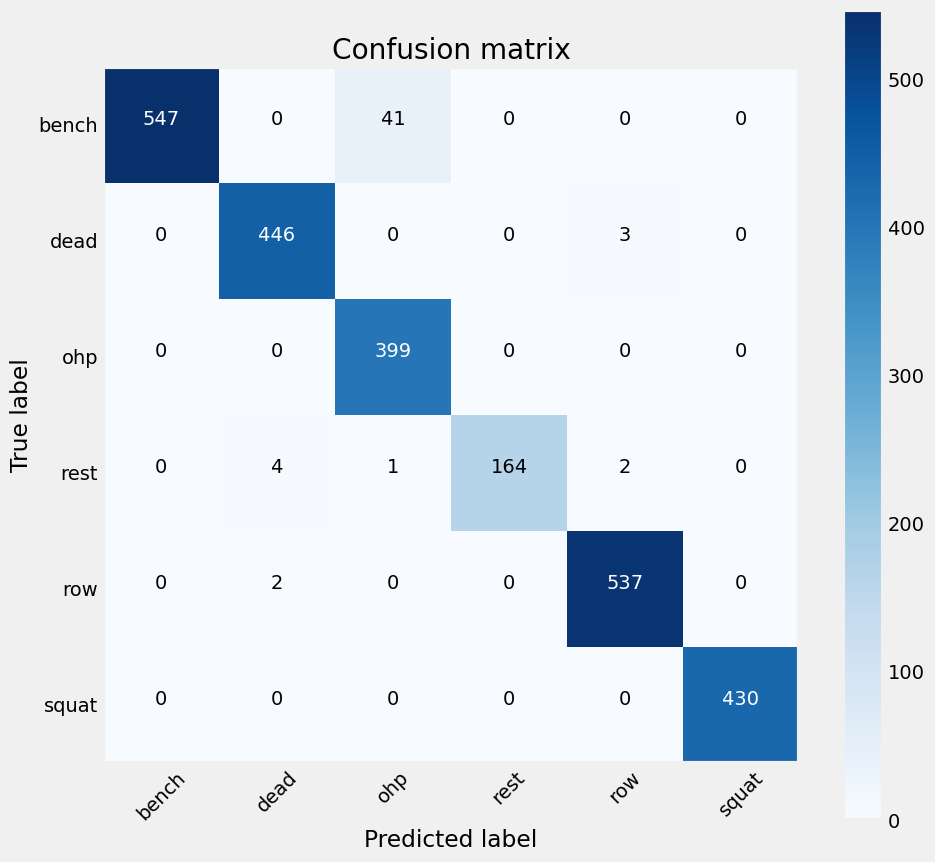

In [17]:
participant_df=df.drop(["Set","Category"],axis=1)
X_train=participant_df[participant_df["Participants"] !="A"].drop(["Label"],axis=1)
y_train=participant_df[participant_df["Participants"] !="A"]["Label"]

X_test=participant_df[participant_df["Participants"] !="A"].drop(["Label"],axis=1)
y_test=participant_df[participant_df["Participants"] !="A"]["Label"]

X_train=X_train.drop(["Participants"],axis=1)
X_test=X_test.drop(["Participants"],axis=1)


class_train_y,class_test_y,class_train_prob_y,class_test_prob_y=learner.random_forest(
    X_train[f_set_4],y_train,X_test[f_set_4],gridsearch=True
)

classes=class_test_prob_y.columns
cm=confusion_matrix(y_test,class_test_y,labels=classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [18]:
accuracy=accuracy_score(y_test,class_test_y)
accuracy

0.9794254658385093

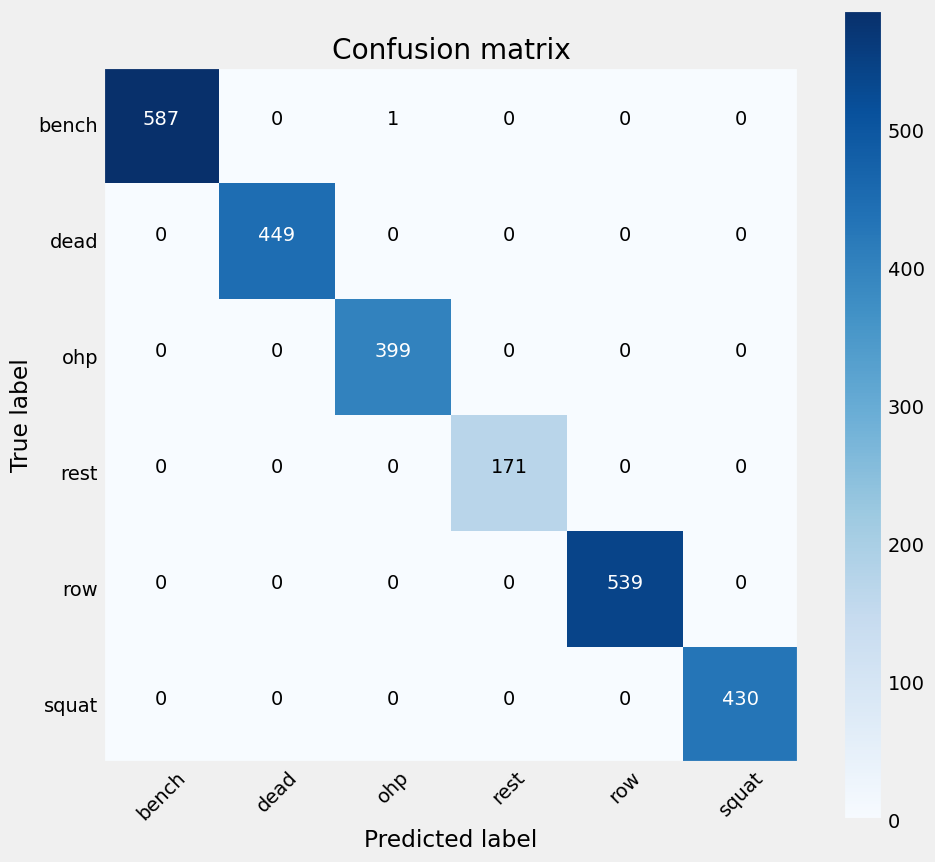

In [19]:

class_train_y,class_test_y,class_train_prob_y,class_test_prob_y=learner.feedforward_neural_network(
    X_train[selected_col],y_train,X_test[selected_col],gridsearch=False
)

classes=class_test_prob_y.columns
cm=confusion_matrix(y_test,class_test_y,labels=classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [20]:
accuracy=accuracy_score(y_test,class_test_y)
accuracy

0.999611801242236